### DATA DESCRIPTION: 
The data set consists of complete educational details of students right from their schooling to MBA and previous work experience. Our main objective is to predict the Salary of the students based on the info available 
 
### ATTRIBUTES:


SlNo                       -          ID of the student            

Gender                  -          Gender of Student                  

Percent_SSC         -          Percentage of marks scored in SSC 


Board_SSC            -          Types of Boards in SSC 


Percent_HSC        -          Percentage of marks scored in HSC 

Board_HSC            -          Types of Boards in HSC 


Stream_HSC          -          Specialization in HSC 

Percent Degree    -           Percentage of marks scored in Degree 

Course_Degree    -          Different courses in degree 

Experience_Yrs    -          Work Experience of the Students 

Entrance_Test      -          Test which students give for MBA college Entrance 

Percentile_ET       -          Percentage of marks scored in Entrance_Test

Percent_MBA       -          Percentage of marks scored in MBA 

Specialization_MBA -          Specialization in MBA 

Marks Communication -          Percentage of marks scored in Communication 

Marks_Projectwork        -          Percentage of marks scored in Project Work 

Placement                        -          Whether Student got placed or not 

Salary                                -          Salary of students 
 

# Problem Statement:

The objective of this project is to develop a predictive model to forecast the salary of students based on their educational background, work experience, and other relevant factors. Using a dataset containing detailed educational information from secondary school to MBA, including percentages, specialization, work experience, entrance test scores, and MBA performance, the goal is to accurately predict the salary of students upon graduation.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import statsmodels.api as sma
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

import csv

with open("data_set.csv","r")as file:
    
    reader=csv.reader(file)

df=pd.read_csv("data_set.csv")

df.head()


,SlNo,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Placement,Salary
0,1,M,62.00,Others,88.00,Others,Commerce,52.00,Science,0,MAT,55.0,58.80,Marketing & HR,50.0,65.0,Placed,270000
1,2,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,1,MAT,86.5,66.28,Marketing & Finance,69.0,70.0,Placed,200000
2,3,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,0,NaN,0.0,52.91,Marketing & Finance,50.0,61.0,Placed,240000
3,4,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,0,MAT,75.0,57.80,Marketing & Finance,54.0,66.0,Placed,250000
4,5,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,1,MAT,66.0,59.43,Marketing & HR,52.0,65.0,Placed,180000


In [3]:
# the number of rows; no. & types of variables (continuous, categorical etc.)
print('rows :',df.shape[0])
print('columns :',df.shape[1])
df.info()

rows : 638
columns : 18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 638 non-null    int64  
 1   Gender               638 non-null    object 
 2   Percent_SSC          638 non-null    float64
 3   Board_SSC            638 non-null    object 
 4   Percent_HSC          638 non-null    float64
 5   Board_HSC            638 non-null    object 
 6   Stream_HSC           638 non-null    object 
 7   Percent_Degree       638 non-null    float64
 8   Course_Degree        638 non-null    object 
 9   Experience_Yrs       638 non-null    int64  
 10  Entrance_Test        557 non-null    object 
 11  Percentile_ET        638 non-null    float64
 12  Percent_MBA          638 non-null    float64
 13  Specialization_MBA   622 non-null    object 
 14  Marks_Communication  638 non-null    float64
 15  Marks_Projectwor

### *`Inference:`*
##### From the above information provided we can see that we have both the categorical  and numerical which is continuous and descrete

##### other than experience_yrs rest of the numerical columns seems to be continuous as per the knowledge experience in the years will only be calculated only based on the number of years and not on the basis of month so it is discrete

##### `Numerical ` i,e continuous , discrete  and the `categorical columns are displayed below`

In [4]:
cat=df.select_dtypes(exclude=np.number)
num=df.select_dtypes(include=np.number)

In [5]:
cat.head() # Categorical columns are

,Gender,Board_SSC,Board_HSC,Stream_HSC,Course_Degree,Entrance_Test,Specialization_MBA,Placement
0,M,Others,Others,Commerce,Science,MAT,Marketing & HR,Placed
1,M,ICSE,Others,Science,Computer Applications,MAT,Marketing & Finance,Placed
2,M,Others,Others,Commerce,Engineering,NaN,Marketing & Finance,Placed
3,M,CBSE,CBSE,Arts,Management,MAT,Marketing & Finance,Placed
4,M,CBSE,ISC,Science,Engineering,MAT,Marketing & HR,Placed


In [6]:
num.head() # Numerical columns are

,SlNo,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Salary
0,1,62.00,88.00,52.00,0,55.0,58.80,50.0,65.0,270000
1,2,76.33,75.33,75.48,1,86.5,66.28,69.0,70.0,200000
2,3,72.00,78.00,66.63,0,0.0,52.91,50.0,61.0,240000
3,4,60.00,63.00,58.00,0,75.0,57.80,54.0,66.0,250000
4,5,61.00,55.00,54.00,1,66.0,59.43,52.0,65.0,180000


In [7]:
# five point summary for numerical variables
df.describe()

,SlNo,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Salary
count,638.000000,638.000000,638.000000,638.000000,638.000000,638.00000,638.000000,638.000000,638.000000,638.000000
mean,319.500000,64.483511,63.825172,63.560846,0.545455,58.78290,62.610611,61.545768,66.082806,237541.692790
std,184.319017,10.966776,11.452802,10.311266,0.700058,26.18736,8.487143,11.640961,9.732895,145160.746448
min,1.000000,37.000000,38.000000,7.000000,0.000000,0.00000,38.000000,35.000000,37.000000,0.000000
25%,160.250000,56.000000,54.000000,56.095000,0.000000,51.00000,56.637500,53.000000,59.000000,162000.000000
50%,319.500000,64.600000,63.000000,63.450000,0.000000,64.00000,61.360000,59.000000,67.000000,250000.000000
75%,478.750000,73.760000,73.000000,71.000000,1.000000,75.50000,67.772500,69.000000,73.000000,320000.000000
max,638.000000,88.800000,94.700000,94.700000,3.000000,99.00000,89.000000,99.000000,94.700000,940000.000000


 ### *`Inference:`*
`the row headers`
`count:` displays us the total number of the rows in each numerical columns

`mean:` gives us the average of each numerical columns

`std:` will give us the standard deviation of all the numerical columns

`min:` gives us the minimum value in each of the columns

`25%:` this the quantile range of 25% or summarization of the 25% of the values in each columns

`50%:` this the quantile or summarization of the 50% of the values in each columns it can also be called as `Median` of all the columns

`50%:` this the quantile range of 50% or summarization of the 50% of the values in each columns

`max:` gives us the max value in each of the columns


In [8]:
# observations for categorical variables – no. of categories, % observations in each category
for i in cat:
    print(round(cat[i].value_counts(normalize=True)*100,2))
    print('########################################')

M    54.55
F    45.45
Name: Gender, dtype: float64
########################################
Others    60.34
ICSE      21.32
CBSE      18.34
Name: Board_SSC, dtype: float64
########################################
Others    44.04
CBSE      33.39
ISC       22.57
Name: Board_HSC, dtype: float64
########################################
Commerce    44.51
Science     33.39
Arts        22.10
Name: Stream_HSC, dtype: float64
########################################
Management               39.50
Engineering              21.94
Commerce                 18.34
Science                  10.19
Computer Applications     7.21
Arts                      2.04
Others                    0.78
Name: Course_Degree, dtype: float64
########################################
MAT      79.17
CAT       7.00
K-MAT     6.64
PGCET     6.28
GCET      0.36
XAT       0.18
G-MAT     0.18
G-SAT     0.18
Name: Entrance_Test, dtype: float64
########################################
Marketing & Finance        43.25
Marketing & HR

In [9]:
#Missing Values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 638 non-null    int64  
 1   Gender               638 non-null    object 
 2   Percent_SSC          638 non-null    float64
 3   Board_SSC            638 non-null    object 
 4   Percent_HSC          638 non-null    float64
 5   Board_HSC            638 non-null    object 
 6   Stream_HSC           638 non-null    object 
 7   Percent_Degree       638 non-null    float64
 8   Course_Degree        638 non-null    object 
 9   Experience_Yrs       638 non-null    int64  
 10  Entrance_Test        557 non-null    object 
 11  Percentile_ET        638 non-null    float64
 12  Percent_MBA          638 non-null    float64
 13  Specialization_MBA   622 non-null    object 
 14  Marks_Communication  638 non-null    float64
 15  Marks_Projectwork    638 non-null    flo

### *`Inference:`*
from the above analysis for the missing values we can find that there are two categorical columns
which is the Entrance_test and the Specialization_MBA 

### *`Null Value Analysis and Treatment:`* 

In [10]:
round(df.isnull().sum()/len(df)*100,2)

SlNo                    0.00
Gender                  0.00
Percent_SSC             0.00
Board_SSC               0.00
Percent_HSC             0.00
Board_HSC               0.00
Stream_HSC              0.00
Percent_Degree          0.00
Course_Degree           0.00
Experience_Yrs          0.00
Entrance_Test          12.70
Percentile_ET           0.00
Percent_MBA             0.00
Specialization_MBA      2.51
Marks_Communication     0.00
Marks_Projectwork       0.00
Placement               0.00
Salary                  0.00
dtype: float64

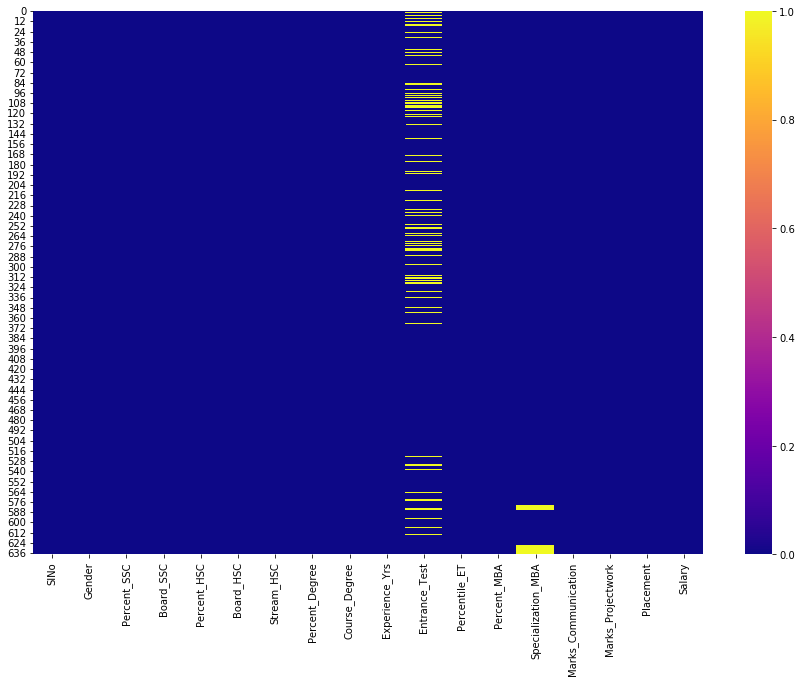

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),cmap='plasma')

### *`Inference:`*
from the above analysis for the NULL values we can find that there are two categorical columns
 Entrance_test consisting 12.70% and the Specialization_MBA  consisting 2.51%  which have the null values which have to be treated

In [12]:
for i in df.columns:
    if df[i].dtypes=='O':
        df[i]=df[i].fillna(df[i].mode()[0])
    else:
        df[i]=df[i].fillna(df[i].median())       

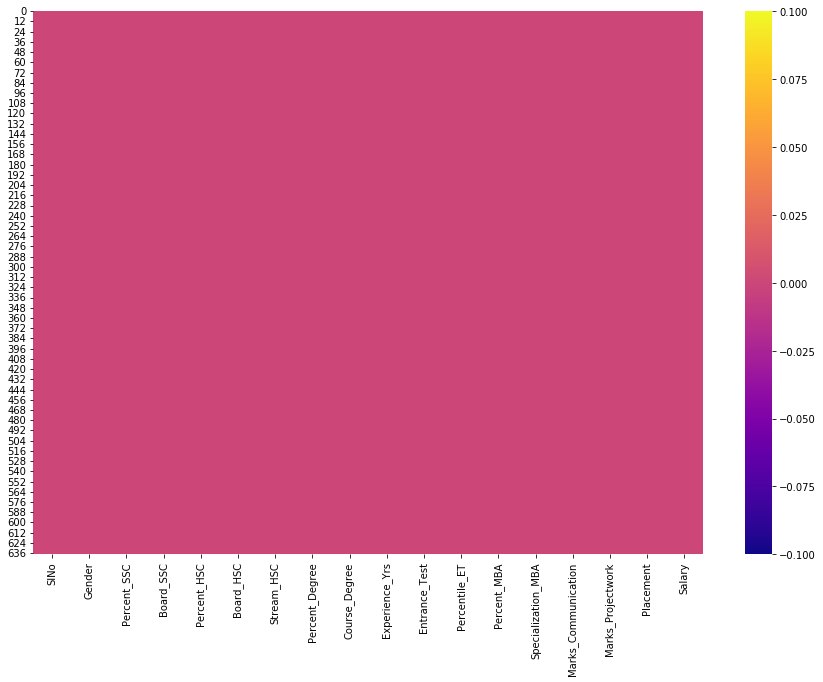

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),cmap='plasma')

### *`Inference:`*
from the above plot after the Null value treatment we cam find that the null values have been successfully treated and there are no null values

### *`Outlier Analysis and Treatment`*:

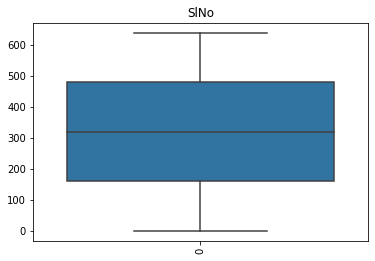

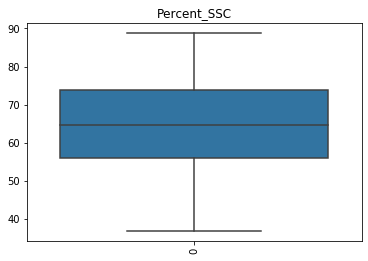

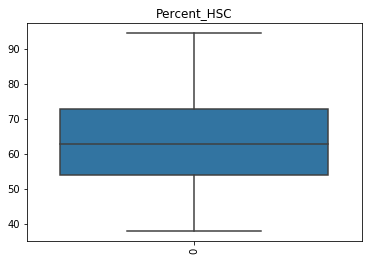

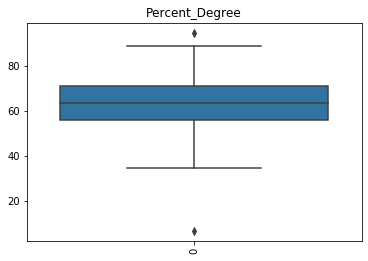

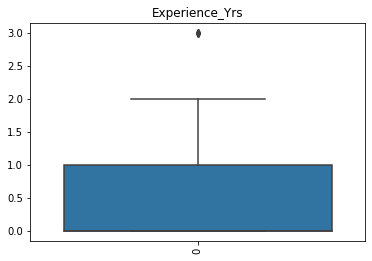

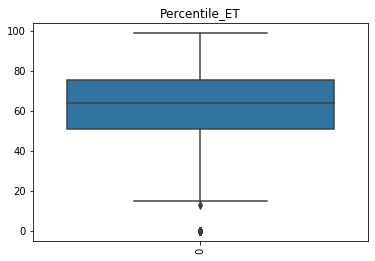

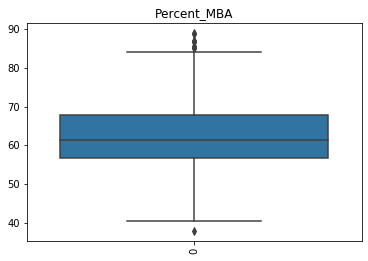

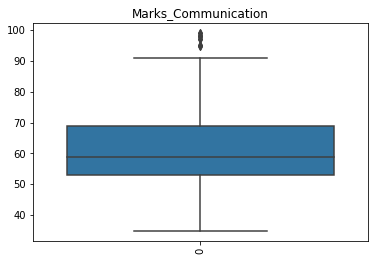

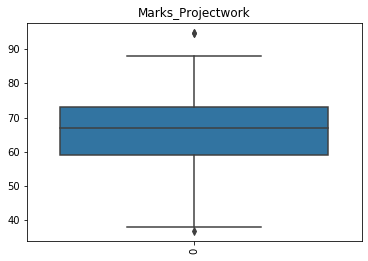

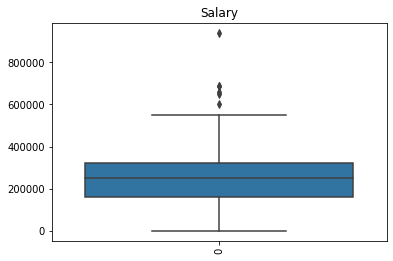

In [14]:
cols=num.columns
for i in num:
    sns.boxplot(num[i])
    plt.xticks(rotation=90)
    plt.title(i)
    plt.show()

### *`Inference:`*
from the above plot we can find that there are some outliers spread out in some columns like Salary,Marks_Projectwork,Marks_COmmunication,Percent_MBA,Percentile_ET,Experience_Yrs,Perecent_Degree

In [15]:
for i in num:
    print(i,num[i].skew())

SlNo 0.0
Percent_SSC -0.05695479468269517
Percent_HSC 0.22812001155428446
Percent_Degree -0.15390888498792332
Experience_Yrs 1.0906981090291052
Percentile_ET -1.0663377118368313
Percent_MBA 0.5235497791250702
Marks_Communication 0.6651852192976754
Marks_Projectwork -0.2339214823500906
Salary 0.09725550164330396


### *`Inference:`*
from the skewness displayed above thare are some positive and negative skewness in some of the columns

In [16]:
#Outlier Treatment:
q3=df.quantile(0.75)
q1=df.quantile(0.25)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q3-1.5*iqr
df1=df[~((df>ul)|(df<ll)).any(axis=1)]

In [17]:
for i in df1.select_dtypes(include=np.number):
    print(i,df1[i].skew())

SlNo 0.27337812210912393
Percent_SSC 0.09974459527752541
Percent_HSC 0.3441500618929861
Percent_Degree 0.364258048805218
Experience_Yrs 0.8556753271807714
Percentile_ET 0.08195746048603957
Percent_MBA 0.6145001440527058
Marks_Communication 0.7260816064664594
Marks_Projectwork -0.0531655685958527
Salary 0.6512913204805423


### *`Inference:`*
from the skewness displayed above there were some positive and negative skewness in some of the columns and they all ware reduced and we have done the outlier treatment but saved it in a different dataframe so that we can do different type of models one with the outlier treatment done and without it as the dataframe without the outlier treatment done will have all the data and there will not be any loss in data we have

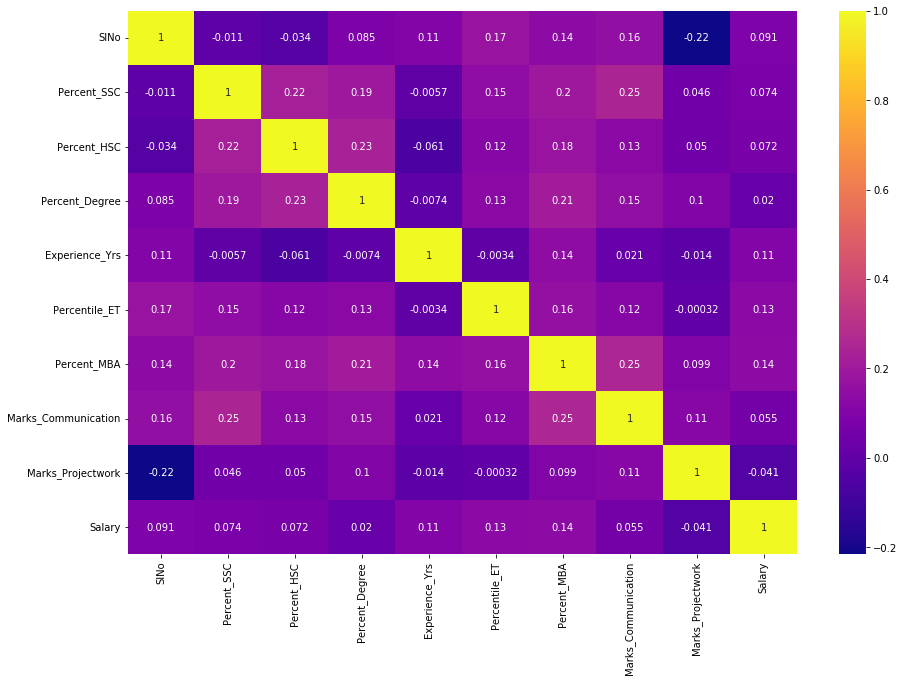

In [18]:
# correlation plots.
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

### *`Inference:`*

Target variable is salary

There is no high correlation between the dependent and the independent variables

There is no high correlation inbetween the independent variable

Every Variable or columns is highly correlated with itself

In [20]:
df.std()

SlNo                      184.319017
Percent_SSC                10.966776
Percent_HSC                11.452802
Percent_Degree             10.311266
Experience_Yrs              0.700058
Percentile_ET              26.187360
Percent_MBA                 8.487143
Marks_Communication        11.640961
Marks_Projectwork           9.732895
Salary                 145160.746448
dtype: float64

We will not be dropping any  columns as we are going to build the model with all the data we have as there will be no data that is lost 

Then we are going to do the VIF and drop some of the unwanted variables if that is necessary

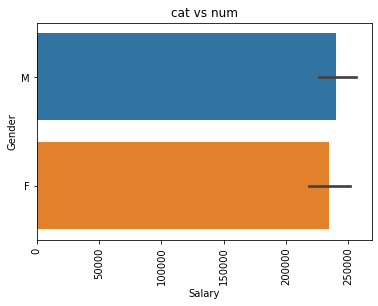

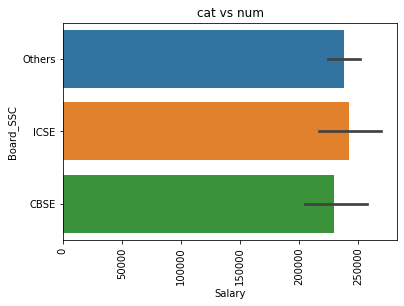

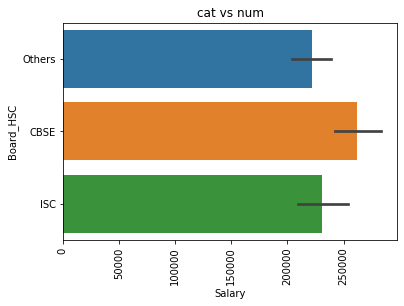

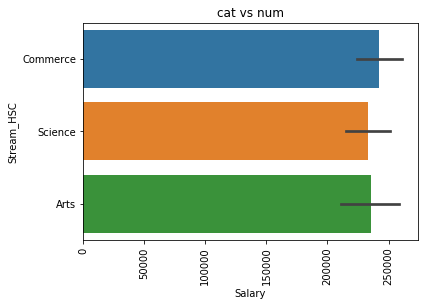

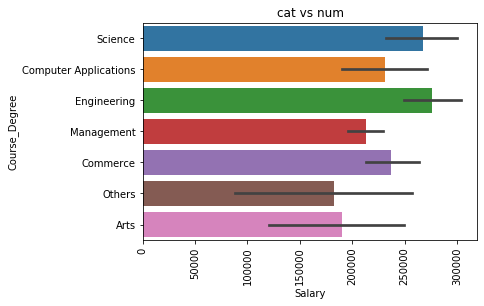

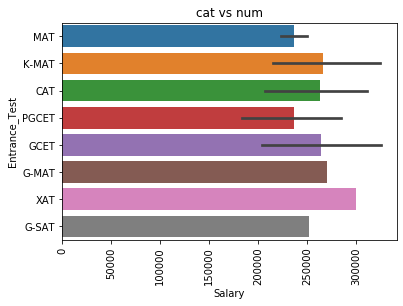

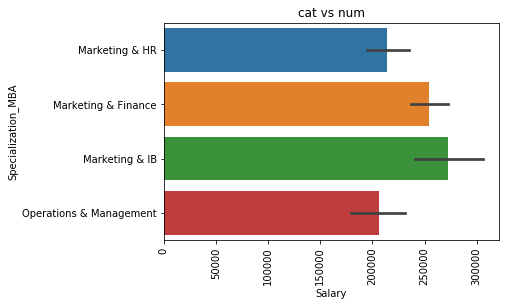

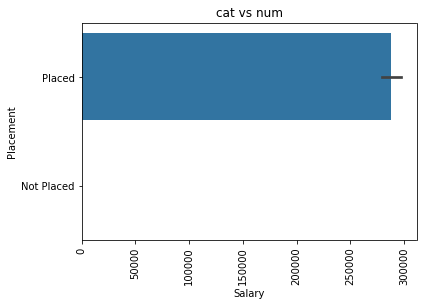

In [23]:
#cat vs num[target variable]
for i in cat:
    sns.barplot(y=cat[i],x=df['Salary'],data=cat)
    plt.xticks(rotation=90)
    plt.title('cat vs num')
    plt.show()

### *`Inference:`*

Target variable is salary numerical

the indviduals who got placed in placement is having high salary

the indviduals who done marketeing & ib is receiveing highest slary

the idvidulas who attended the entrance test xstat are having highest salary

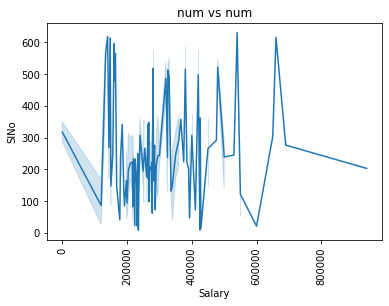

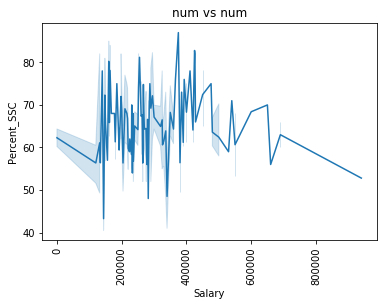

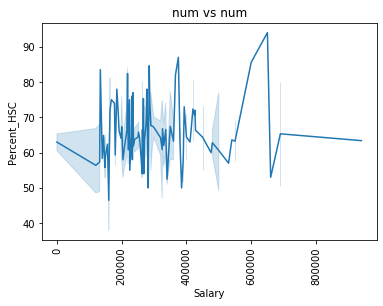

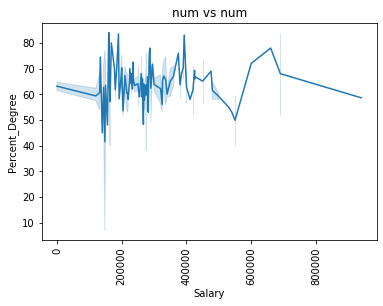

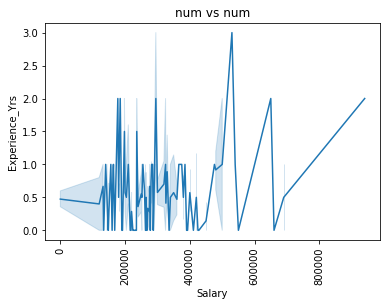

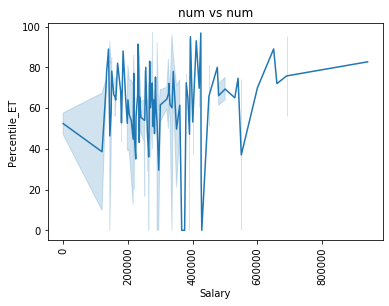

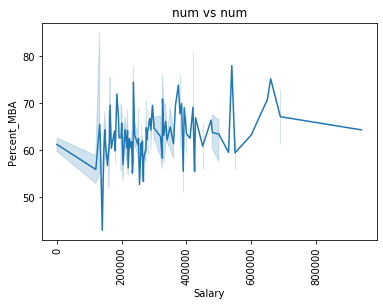

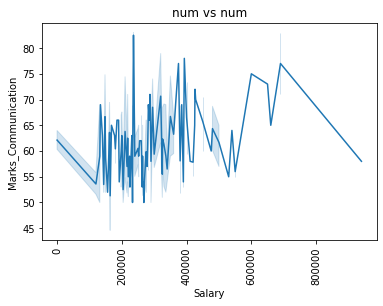

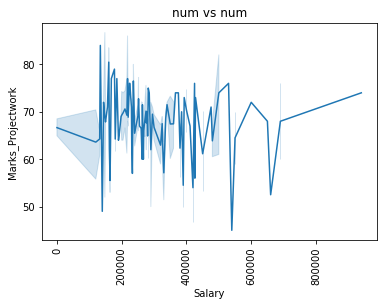

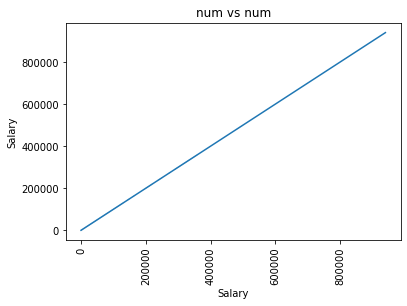

In [80]:
#num vs num[target variable]

for i in num:
    sns.pair(y=num[i],x=df['Salary'],data=num)
    plt.xticks(rotation=90)
    plt.title('num vs num')
    plt.show()

### *`Inference:`*

Target variable is salary numerical

the indviduals who got highest mark  in project work is having high salary

the indviduals who got highest mark  in communication  is having high salary

the idvidulas who attended the entrance test xstat are having highest salary

In [25]:
###ENCODEING CATEGORICAL TO NUMERICAL
#Encoded on the data without removeing outliers
le=LabelEncoder()
for i in cat:
    cat[i]=le.fit_transform(cat[i])
df2=pd.concat([num,cat],axis=1)
df2.head()

,SlNo,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Salary,Gender,Board_SSC,Board_HSC,Stream_HSC,Course_Degree,Entrance_Test,Specialization_MBA,Placement
0,1,62.00,88.00,52.00,0,55.0,58.80,50.0,65.0,270000,1,2,2,1,6,5,1,1
1,2,76.33,75.33,75.48,1,86.5,66.28,69.0,70.0,200000,1,1,2,2,2,5,0,1
2,3,72.00,78.00,66.63,0,0.0,52.91,50.0,61.0,240000,1,2,2,1,3,8,0,1
3,4,60.00,63.00,58.00,0,75.0,57.80,54.0,66.0,250000,1,0,0,0,4,5,0,1
4,5,61.00,55.00,54.00,1,66.0,59.43,52.0,65.0,180000,1,0,1,2,3,5,1,1


In [26]:
#Encoded on the data with removeing outliers
cat1=df1.select_dtypes(exclude=np.number)
num1=df1.select_dtypes(include=np.number)
le=LabelEncoder()
for i in cat1:
    cat1[i]=le.fit_transform(cat1[i])
df3_o=pd.concat([num1,cat1],axis=1)
df3_o.head()

,SlNo,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Salary,Gender,Board_SSC,Board_HSC,Stream_HSC,Course_Degree,Entrance_Test,Specialization_MBA,Placement
0,1,62.00,88.00,52.00,0,55.00,58.80,50.0,65.0,270000,1,2,2,1,6,3,1,0
1,2,76.33,75.33,75.48,1,86.50,66.28,69.0,70.0,200000,1,1,2,2,2,3,0,0
3,4,60.00,63.00,58.00,0,75.00,57.80,54.0,66.0,250000,1,0,0,0,4,3,0,0
4,5,61.00,55.00,54.00,1,66.00,59.43,52.0,65.0,180000,1,0,1,2,3,3,1,0
7,8,68.00,77.00,72.50,0,43.12,57.23,74.0,72.0,235000,1,1,1,1,4,3,0,0


In [27]:
x=df2.drop('Salary',axis=1)
y=df2['Salary']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [28]:
print('training data of independent variables:',xtrain.shape)
print('testing data of independent variables:',xtest.shape)
print('training data of dependent variable:',ytrain.shape[0])
print('testing data of dependent variables:',ytest.shape[0])

training data of independent variables: (446, 17)
testing data of independent variables: (192, 17)
training data of dependent variable: 446
testing data of dependent variables: 192


In [29]:
#assumeing confidence interval of 95% we are frameing the hypothesis testing
#h0:mu1=mu2 #means are same
#h1:mu1!=mu2 #means are not same
stats.ttest_ind(ytrain,ytest)
#since p_value is greater than the sig_value which is 0.05 we fail to reject h0 
#and conclude that the all means are same and hence statisticall proved

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=0.4334458268942494, pvalue=0.6648378851735655)

In [30]:
#Fit a base model. Please write your key observations 
lr=LinearRegression()
bm=lr.fit(xtrain,ytrain)
ypred_bm=bm.predict(xtest)
ypred_bm_train=bm.predict(xtrain)
# we are takeing Linear Regression as the base model because our target variable is numerical
# and it works on the principle of the equation y= mx+c

In [31]:
print('testing data:',r2_score(ypred_bm,ytest))
print('training data:',r2_score(ypred_bm_train,ytrain))
#our models perfomance is good on compareing the training data and the testing data but however
#our models overall perfomace is under fit

testing data: 0.28282895217464166
training data: 0.435044733639921


In [32]:
x_c=sma.add_constant(xtrain)
model=sma.OLS(ytrain,x_c)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     44.56
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           1.79e-83
Time:                        06:37:54   Log-Likelihood:                -5721.2
No. Observations:                 446   AIC:                         1.148e+04
Df Residuals:                     428   BIC:                         1.155e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.241e+04   6.29e+04     -0.197      0.844   -1.36e+05    1.11e+05
SlNo                  100.7101     31.107      3.238      0.001      39.568     161.852
Percent_SSC          -171.4270    433.884     -0.395      0.693   -1024.235     681.381
Percent_HSC           456.3654    409.650      1.114      0.266    -348.810    1261.541
Percent_Degree       -476.2887    453.806     -1.050      0.295   -1368.254     415.677
Experience_Yrs       2.026e+04   6275.806      3.228      0.001    7923.067    3.26e+04
Percentile_ET         157.5758    192.753      0.818      0.414    -221.284     536.435
Percent_MBA          1047.9978    575.191      1.822      0.069     -82.552    2178.548
Marks_Communication   336.5395    408.361      0.824      0.410    -466.103    1139.182
Marks_Projectwork    -735.2672    472.930     -1.555      0.121   -1664.822     194.287
Gender               4764.6691   9882.090      0.482      0.630   -1.47e+04    2.42e+04
Board_SSC            1398.8564   6536.479      0.214      0.831   -1.14e+04    1.42e+04
Board_HSC           -7446.0100   5975.511     -1.246      0.213   -1.92e+04    4298.988
Stream_HSC           4776.1530   6839.370      0.698      0.485   -8666.780    1.82e+04
Course_Degree       -4101.6336   3109.075     -1.319      0.188   -1.02e+04    2009.323
Entrance_Test       -5525.1458   2970.176     -1.860      0.064   -1.14e+04     312.800
Specialization_MBA  -1.844e+04   4476.773     -4.120      0.000   -2.72e+04   -9643.088
Placement            2.866e+05   1.14e+04     25.107      0.000    2.64e+05    3.09e+05
==============================================================================
Omnibus:                      146.608   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              665.484
Skew:                           1.377   Prob(JB):                    3.10e-145
Kurtosis:                       8.312   Cond. No.                     5.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# the rsquare is 0.639
# the adjusted rsquare is 0.625
#the r2 i,e.. rsquare is the measure of how good our model is performing 
# the adjusted r2 i,e.. adjusted rsquare is the model built removeing the insignificant variables
# that is the main reason why they both arev different

In [34]:

#stream_HSC,Board_SSC,Gender,Marks_Communicationm,Percent_SSC
#these are the most significant variables

In [35]:
#in order to remove the multicollinearity present we do the  vif
vif=pd.DataFrame()
vif['variables']=xtrain.columns
vif['VIF']=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]
vif.sort_values(by='VIF',ascending=False)
#yes there is presence of multicollinearity

,variables,VIF
6,Percent_MBA,65.174633
8,Marks_Projectwork,43.400141
3,Percent_Degree,41.616319
1,Percent_SSC,40.952875
2,Percent_HSC,34.164928
7,Marks_Communication,33.500352
14,Entrance_Test,11.224996
5,Percentile_ET,7.737015
0,SlNo,6.489376
13,Course_Degree,6.338711


In [36]:
x=df2.drop(['Percent_MBA','Salary'],axis=1)
y=df2['Salary']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)
x_c=sma.add_constant(xtrain)
model=sma.OLS(ytrain,x_c)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     46.89
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           1.30e-83
Time:                        06:37:54   Log-Likelihood:                -5722.9
No. Observations:                 446   AIC:                         1.148e+04
Df Residuals:                     429   BIC:                         1.155e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.63e+04    6.1e+04      0.267      0.790   -1.04e+05    1.36e+05
SlNo                  104.4439     31.123      3.356      0.001      43.271     165.617
Percent_SSC          -105.6879    433.549     -0.244      0.808    -957.831     746.456
Percent_HSC           561.1225    406.690      1.380      0.168    -238.230    1360.475
Percent_Degree       -368.1284    451.121     -0.816      0.415   -1254.811     518.554
Experience_Yrs       2.162e+04   6247.721      3.461      0.001    9343.825    3.39e+04
Percentile_ET         175.6937    193.016      0.910      0.363    -203.680     555.068
Marks_Communication   471.4532    402.676      1.171      0.242    -320.010    1262.916
Marks_Projectwork    -650.7990    471.923     -1.379      0.169   -1578.368     276.770
Gender               3991.4867   9899.631      0.403      0.687   -1.55e+04    2.34e+04
Board_SSC            2136.2265   6541.553      0.327      0.744   -1.07e+04     1.5e+04
Board_HSC           -7614.3818   5990.928     -1.271      0.204   -1.94e+04    4160.841
Stream_HSC           4894.7071   6857.526      0.714      0.476   -8583.822    1.84e+04
Course_Degree       -3889.7131   3115.287     -1.249      0.212      -1e+04    2233.413
Entrance_Test       -5579.1565   2978.047     -1.873      0.062   -1.14e+04     274.221
Specialization_MBA   -1.81e+04   4484.906     -4.036      0.000   -2.69e+04   -9284.863
Placement            2.877e+05   1.14e+04     25.170      0.000    2.65e+05     3.1e+05
==============================================================================
Omnibus:                      146.418   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              669.974
Skew:                           1.372   Prob(JB):                    3.29e-146
Kurtosis:                       8.340   Cond. No.                     5.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
#now our model is getting overfit

In [38]:
vif=pd.DataFrame()
vif['variables']=xtrain.columns
vif['VIF']=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,variables,VIF
7,Marks_Projectwork,41.058858
1,Percent_SSC,40.143619
3,Percent_Degree,39.709200
2,Percent_HSC,32.408702
6,Marks_Communication,31.817099
13,Entrance_Test,11.112277
5,Percentile_ET,7.676024
0,SlNo,6.388168
12,Course_Degree,6.310082
9,Board_SSC,6.070187


In [39]:
x=df2.drop(['Marks_Projectwork','Percent_MBA','Salary'],axis=1)
y=df2['Salary']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)
x_c=sma.add_constant(xtrain)
model=sma.OLS(ytrain,x_c)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     49.78
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           4.58e-84
Time:                        06:37:54   Log-Likelihood:                -5723.9
No. Observations:                 446   AIC:                         1.148e+04
Df Residuals:                     430   BIC:                         1.155e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.272e+04   5.41e+04     -0.420      0.675   -1.29e+05    8.36e+04
SlNo                  109.4207     30.946      3.536      0.000      48.597     170.245
Percent_SSC           -98.5114    433.972     -0.227      0.821    -951.481     754.458
Percent_HSC           570.8116    407.055      1.402      0.162    -229.254    1370.877
Percent_Degree       -423.5601    449.798     -0.942      0.347   -1307.636     460.516
Experience_Yrs       2.131e+04   6250.164      3.410      0.001    9027.033    3.36e+04
Percentile_ET         170.4461    193.180      0.882      0.378    -209.249     550.141
Marks_Communication   387.7944    398.497      0.973      0.331    -395.450    1171.039
Gender               4368.7503   9906.221      0.441      0.659   -1.51e+04    2.38e+04
Board_SSC            2618.6703   6539.037      0.400      0.689   -1.02e+04    1.55e+04
Board_HSC           -8267.5156   5978.436     -1.383      0.167      -2e+04    3483.078
Stream_HSC           4611.5063   6861.633      0.672      0.502   -8875.008    1.81e+04
Course_Degree       -3569.3376   3109.869     -1.148      0.252   -9681.772    2543.097
Entrance_Test       -5488.6006   2980.443     -1.842      0.066   -1.13e+04     369.448
Specialization_MBA  -1.754e+04   4471.095     -3.923      0.000   -2.63e+04   -8751.004
Placement            2.882e+05   1.14e+04     25.212      0.000    2.66e+05    3.11e+05
==============================================================================
Omnibus:                      145.555   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              652.037
Skew:                           1.371   Prob(JB):                    2.58e-142
Kurtosis:                       8.250   Cond. No.                     4.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
vif=pd.DataFrame()
vif['variables']=xtrain.columns
vif['VIF']=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,variables,VIF
1,Percent_SSC,39.664258
3,Percent_Degree,36.544412
2,Percent_HSC,31.558627
6,Marks_Communication,29.430343
12,Entrance_Test,10.644481
5,Percentile_ET,7.594588
0,SlNo,6.387651
11,Course_Degree,6.307457
8,Board_SSC,6.070164
14,Placement,5.449131


In [41]:
x=df2.drop(['Marks_Projectwork','Percent_MBA','Salary','Percent_SSC'],axis=1)
y=df2['Salary']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)
x_c=sma.add_constant(xtrain)
model=sma.OLS(ytrain,x_c)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     53.45
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           6.30e-85
Time:                        06:38:31   Log-Likelihood:                -5723.9
No. Observations:                 446   AIC:                         1.148e+04
Df Residuals:                     431   BIC:                         1.154e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.582e+04   5.23e+04     -0.494      0.622   -1.29e+05     7.7e+04
SlNo                  109.8489     30.854      3.560      0.000      49.205     170.492
Percent_HSC           556.1262    401.439      1.385      0.167    -232.896    1345.148
Percent_Degree       -432.9963    447.380     -0.968      0.334   -1312.314     446.321
Experience_Yrs       2.136e+04   6239.286      3.424      0.001    9099.257    3.36e+04
Percentile_ET         165.7363    191.851      0.864      0.388    -211.345     542.817
Marks_Communication   370.0478    390.323      0.948      0.344    -397.125    1137.221
Gender               4523.3087   9871.915      0.458      0.647   -1.49e+04    2.39e+04
Board_SSC            2557.0898   6526.215      0.392      0.695   -1.03e+04    1.54e+04
Board_HSC           -8328.1019   5965.900     -1.396      0.163   -2.01e+04    3397.775
Stream_HSC           4393.5173   6786.622      0.647      0.518   -8945.476    1.77e+04
Course_Degree       -3560.5574   3106.205     -1.146      0.252   -9665.751    2544.636
Entrance_Test       -5502.1998   2976.560     -1.849      0.065   -1.14e+04     348.179
Specialization_MBA  -1.758e+04   4462.003     -3.941      0.000   -2.64e+04   -8812.774
Placement            2.881e+05   1.14e+04     25.273      0.000    2.66e+05     3.1e+05
==============================================================================
Omnibus:                      146.001   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              658.311
Skew:                           1.373   Prob(JB):                    1.12e-143
Kurtosis:                       8.280   Cond. No.                     4.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
vif=pd.DataFrame()
vif['variables']=xtrain.columns
vif['VIF']=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,variables,VIF
2,Percent_Degree,34.754706
1,Percent_HSC,29.123223
5,Marks_Communication,26.905541
11,Entrance_Test,10.394009
4,Percentile_ET,7.397429
0,SlNo,6.387013
10,Course_Degree,6.306382
7,Board_SSC,6.041425
13,Placement,5.392111
9,Stream_HSC,4.384037


In [43]:
x=df2.drop(['Marks_Projectwork','Percent_MBA','Salary','Percent_SSC','Percent_Degree'],axis=1)
y=df2['Salary']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)
x_c=sma.add_constant(xtrain)
model=sma.OLS(ytrain,x_c)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     57.50
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           1.29e-85
Time:                        06:39:26   Log-Likelihood:                -5724.4
No. Observations:                 446   AIC:                         1.148e+04
Df Residuals:                     432   BIC:                         1.153e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.851e+04   4.68e+04     -1.037      0.300    -1.4e+05    4.34e+04
SlNo                  109.8505     30.852      3.561      0.000      49.212     170.489
Percent_HSC           492.2178    395.942      1.243      0.214    -285.995    1270.431
Experience_Yrs       2.116e+04   6235.212      3.393      0.001    8901.737    3.34e+04
Percentile_ET         160.4197    191.759      0.837      0.403    -216.477     537.316
Marks_Communication   348.7547    389.674      0.895      0.371    -417.138    1114.647
Gender               6197.4483   9718.478      0.638      0.524   -1.29e+04    2.53e+04
Board_SSC            2946.8137   6513.304      0.452      0.651   -9854.893    1.57e+04
Board_HSC           -8542.9480   5961.332     -1.433      0.153   -2.03e+04    3173.875
Stream_HSC           3732.5387   6751.679      0.553      0.581   -9537.687     1.7e+04
Course_Degree       -3678.7163   3103.577     -1.185      0.237   -9778.706    2421.273
Entrance_Test       -5258.8691   2965.706     -1.773      0.077   -1.11e+04     570.139
Specialization_MBA   -1.78e+04   4456.129     -3.994      0.000   -2.66e+04   -9039.674
Placement            2.879e+05   1.14e+04     25.262      0.000    2.65e+05     3.1e+05
==============================================================================
Omnibus:                      147.548   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              664.271
Skew:                           1.390   Prob(JB):                    5.69e-145
Kurtosis:                       8.293   Cond. No.                     4.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
vif=pd.DataFrame()
vif['variables']=xtrain.columns
vif['VIF']=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,variables,VIF
4,Marks_Communication,25.039950
1,Percent_HSC,23.585651
10,Entrance_Test,10.135266
3,Percentile_ET,7.243266
0,SlNo,6.323436
9,Course_Degree,6.250495
6,Board_SSC,6.040439
12,Placement,5.332328
8,Stream_HSC,4.261717
7,Board_HSC,3.709926


In [45]:
x=df2.drop(['Marks_Projectwork','Percent_MBA','Salary','Percent_SSC','Percent_Degree','Marks_Communication'],axis=1)
y=df2['Salary']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)
x_c=sma.add_constant(xtrain)
model=sma.OLS(ytrain,x_c)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     62.25
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           2.37e-86
Time:                        06:40:42   Log-Likelihood:                -5724.8
No. Observations:                 446   AIC:                         1.148e+04
Df Residuals:                     433   BIC:                         1.153e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.027e+04   4.21e+04     -0.719      0.472   -1.13e+05    5.24e+04
SlNo                 111.6039     30.783      3.626      0.000      51.102     172.106
Percent_HSC          532.4374    393.293      1.354      0.177    -240.564    1305.439
Experience_Yrs      2.121e+04   6233.451      3.403      0.001    8962.490    3.35e+04
Percentile_ET        169.8205    191.427      0.887      0.376    -206.421     546.062
Gender              5519.6575   9686.700      0.570      0.569   -1.35e+04    2.46e+04
Board_SSC           3075.7136   6510.215      0.472      0.637   -9719.839    1.59e+04
Board_HSC          -8672.7605   5958.198     -1.456      0.146   -2.04e+04    3037.826
Stream_HSC          4171.8660   6732.264      0.620      0.536   -9060.114    1.74e+04
Course_Degree      -3686.8544   3102.851     -1.188      0.235   -9785.376    2411.668
Entrance_Test      -5362.2828   2962.773     -1.810      0.071   -1.12e+04     460.923
Specialization_MBA  -1.78e+04   4455.104     -3.995      0.000   -2.66e+04   -9040.757
Placement           2.876e+05   1.14e+04     25.254      0.000    2.65e+05     3.1e+05
==============================================================================
Omnibus:                      148.268   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              669.649
Skew:                           1.397   Prob(JB):                    3.87e-146
Kurtosis:                       8.313   Cond. No.                     3.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
vif=pd.DataFrame()
vif['variables']=xtrain.columns
vif['VIF']=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,variables,VIF
1,Percent_HSC,18.123985
9,Entrance_Test,9.659549
3,Percentile_ET,6.976360
8,Course_Degree,6.227576
0,SlNo,6.117017
5,Board_SSC,6.010118
11,Placement,5.305534
7,Stream_HSC,4.144474
6,Board_HSC,3.687485
10,Specialization_MBA,2.466103


In [47]:
x=df2.drop(['Marks_Projectwork','Percent_MBA','Salary','Percent_SSC','Percent_Degree','Marks_Communication','Percent_HSC'],axis=1)
y=df2['Salary']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)
x_c=sma.add_constant(xtrain)
model=sma.OLS(ytrain,x_c)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     67.62
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           6.92e-87
Time:                        06:41:29   Log-Likelihood:                -5725.7
No. Observations:                 446   AIC:                         1.148e+04
Df Residuals:                     434   BIC:                         1.152e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               8669.7011   3.07e+04      0.282      0.778   -5.18e+04    6.91e+04
SlNo                 107.3928     30.654      3.503      0.001      47.143     167.643
Experience_Yrs       2.08e+04   6231.896      3.338      0.001    8551.093     3.3e+04
Percentile_ET        198.4628    190.437      1.042      0.298    -175.830     572.755
Gender              3695.4068   9601.715      0.385      0.701   -1.52e+04    2.26e+04
Board_SSC           2971.1966   6515.999      0.456      0.649   -9835.642    1.58e+04
Board_HSC          -9005.2146   5958.844     -1.511      0.131   -2.07e+04    2706.566
Stream_HSC          3133.7635   6694.864      0.468      0.640      -1e+04    1.63e+04
Course_Degree      -3938.9087   3100.230     -1.271      0.205      -1e+04    2154.423
Entrance_Test      -5499.2611   2963.884     -1.855      0.064   -1.13e+04     326.091
Specialization_MBA -1.827e+04   4445.397     -4.111      0.000    -2.7e+04   -9537.082
Placement           2.872e+05   1.14e+04     25.201      0.000    2.65e+05     3.1e+05
==============================================================================
Omnibus:                      145.252   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              644.809
Skew:                           1.371   Prob(JB):                    9.58e-141
Kurtosis:                       8.213   Cond. No.                     2.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
vif=pd.DataFrame()
vif['variables']=xtrain.columns
vif['VIF']=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,variables,VIF
8,Entrance_Test,7.142004
7,Course_Degree,6.210042
0,SlNo,6.024604
4,Board_SSC,5.957869
2,Percentile_ET,5.447384
10,Placement,5.177272
6,Stream_HSC,4.131198
5,Board_HSC,3.595347
9,Specialization_MBA,2.462815
3,Gender,2.380773


In [49]:
x=df2.drop(['Marks_Projectwork','Percent_MBA','Salary','Percent_SSC','Percent_Degree','Marks_Communication','Percent_HSC','Entrance_Test'],axis=1)
y=df2['Salary']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)
x_c=sma.add_constant(xtrain)
model=sma.OLS(ytrain,x_c)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     73.62
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           4.27e-87
Time:                        06:42:34   Log-Likelihood:                -5727.5
No. Observations:                 446   AIC:                         1.148e+04
Df Residuals:                     435   BIC:                         1.152e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.991e+04   2.27e+04     -1.317      0.189   -7.45e+04    1.47e+04
SlNo                 106.6640     30.738      3.470      0.001      46.251     167.077
Experience_Yrs      2.086e+04   6249.274      3.338      0.001    8580.636    3.31e+04
Percentile_ET        366.7790    167.911      2.184      0.029      36.761     696.797
Gender              5817.2902   9560.095      0.608      0.543    -1.3e+04    2.46e+04
Board_SSC           2863.8048   6534.010      0.438      0.661   -9978.351    1.57e+04
Board_HSC          -8486.4733   5968.970     -1.422      0.156   -2.02e+04    3245.133
Stream_HSC          1944.3325   6682.786      0.291      0.771   -1.12e+04    1.51e+04
Course_Degree      -3797.7306   3107.985     -1.222      0.222   -9906.266    2310.804
Specialization_MBA -1.774e+04   4448.341     -3.987      0.000   -2.65e+04   -8992.606
Placement           2.871e+05   1.14e+04     25.123      0.000    2.65e+05     3.1e+05
==============================================================================
Omnibus:                      140.026   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              588.377
Skew:                           1.337   Prob(JB):                    1.72e-128
Kurtosis:                       7.951   Cond. No.                     1.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
vif=pd.DataFrame()
vif['variables']=xtrain.columns
vif['VIF']=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,variables,VIF
7,Course_Degree,6.151342
4,Board_SSC,5.824330
0,SlNo,5.524069
2,Percentile_ET,5.264171
9,Placement,4.862732
6,Stream_HSC,3.698376
5,Board_HSC,3.464409
8,Specialization_MBA,2.459241
3,Gender,2.326772
1,Experience_Yrs,1.612896


In [51]:
x=df2.drop(['Marks_Projectwork','Percent_MBA','Salary','Percent_SSC','Percent_Degree','Marks_Communication','Percent_HSC','Entrance_Test','Course_Degree'],axis=1)
y=df2['Salary']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)
x_c=sma.add_constant(xtrain)
model=sma.OLS(ytrain,x_c)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     81.54
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           9.60e-88
Time:                        06:44:00   Log-Likelihood:                -5728.3
No. Observations:                 446   AIC:                         1.148e+04
Df Residuals:                     436   BIC:                         1.152e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -3.46e+04   2.24e+04     -1.545      0.123   -7.86e+04    9418.184
SlNo                 102.1860     30.536      3.346      0.001      42.170     162.202
Experience_Yrs      2.064e+04   6250.206      3.303      0.001    8358.676    3.29e+04
Percentile_ET        352.2065    167.582      2.102      0.036      22.838     681.575
Gender              5990.6920   9564.445      0.626      0.531   -1.28e+04    2.48e+04
Board_SSC           1424.3571   6430.574      0.221      0.825   -1.12e+04    1.41e+04
Board_HSC          -7965.6746   5957.099     -1.337      0.182   -1.97e+04    3742.527
Stream_HSC           -39.2590   6486.290     -0.006      0.995   -1.28e+04    1.27e+04
Specialization_MBA -1.872e+04   4377.643     -4.276      0.000   -2.73e+04   -1.01e+04
Placement           2.867e+05   1.14e+04     25.083      0.000    2.64e+05    3.09e+05
==============================================================================
Omnibus:                      136.911   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              556.299
Skew:                           1.316   Prob(JB):                    1.59e-121
Kurtosis:                       7.796   Cond. No.                     1.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
vif=pd.DataFrame()
vif['variables']=xtrain.columns
vif['VIF']=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,variables,VIF
4,Board_SSC,5.532648
0,SlNo,5.290925
2,Percentile_ET,5.166444
8,Placement,4.815447
5,Board_HSC,3.463292
6,Stream_HSC,3.289963
7,Specialization_MBA,2.354091
3,Gender,2.321744
1,Experience_Yrs,1.608169


In [ ]:
#so now have removed the multi colinearity

In [ ]:

##we tried to do Lasso ,Ridge , ElasticNet , SGD_REGRESSOR and the RandomForestRegressor
#with the columns we removed now useing vif and wethout removeing the vif
#we didnt remove the outliers and build the model as it may affect our models perfomance

In [61]:
r=Ridge()
m1=r.fit(xtrain,ytrain)
ypred_m1=m1.predict(xtest)
print('testing data r2 score:',r2_score(ypred_m1,ytest))
print('testing data rmse value:',np.sqrt(mean_squared_error(ypred_m1,ytest)))
print('testing data mse value:',(mean_squared_error(ypred_m1,ytest)))
print('testing data mae value:',(mean_absolute_error(ypred_m1,ytest)))
# the model's perfomance have decreased on compareing the base model and the stats models

testing data r2 score: 0.23590464104172648
testing data rmse value: 92893.31568327162
testing data mse value: 8629168098.631956
testing data mae value: 70938.75504707708


In [62]:
l=Lasso()
m2=l.fit(xtrain,ytrain)
ypred_m2=m2.predict(xtest)
print('testing data:',r2_score(ypred_m2,ytest))
print('testing data rmse value:',np.sqrt(mean_squared_error(ypred_m2,ytest)))
print('testing data mse value:',(mean_squared_error(ypred_m2,ytest)))
print('testing data mae value:',(mean_absolute_error(ypred_m2,ytest)))
# the model's perfomance have increased slightly on compareing the Ridge model 

testing data: 0.2553842554687207
testing data rmse value: 92939.40731736948
testing data mse value: 8637733432.503912
testing data mae value: 70877.98142880564


In [63]:
en=ElasticNet()
m3=en.fit(xtrain,ytrain)
ypred_m3=m3.predict(xtest)
print('testing data:',r2_score(ypred_m3,ytest))
print('testing data rmse value:',np.sqrt(mean_squared_error(ypred_m3,ytest)))
print('testing data mse value:',(mean_squared_error(ypred_m3,ytest)))
print('testing data mae value:',(mean_absolute_error(ypred_m3,ytest)))
# the model's perfomance have decresed vastly on compareing the lasso model 

testing data: -8.257949882959304
testing data rmse value: 118492.59132142704
testing data mse value: 14040494198.066727
testing data mae value: 93612.22304787941


In [64]:
gd=SGDRegressor()
m4=gd.fit(xtrain,ytrain)
ypred_m4=m4.predict(xtest)
print('testing data:',r2_score(ypred_m4,ytest))
print('testing data rmse value:',np.sqrt(mean_squared_error(ypred_m4,ytest)))
print('testing data mse value:',(mean_squared_error(ypred_m4,ytest)))
print('testing data mae value:',(mean_absolute_error(ypred_m4,ytest)))
# the model's perfomance have improved  on compareing the elasticnet model 

testing data: -3.1609604766696124
testing data rmse value: 15157497815749.424
testing data mse value: 2.2974974003444857e+26
testing data mae value: 13211176035009.89


In [65]:
rf=RandomForestRegressor()
m5=rf.fit(xtrain,ytrain)
ypred_m5=m5.predict(xtest)
print('testing data:',r2_score(ypred_m5,ytest))
print('testing data rmse value:',np.sqrt(mean_squared_error(ypred_m5,ytest)))
print('testing data mse value:',(mean_squared_error(ypred_m5,ytest)))
print('testing data mae value:',(mean_absolute_error(ypred_m5,ytest)))
# the model's perfomance have improved  good on verifying the perfomance comapred to  SGDRegressor

testing data: 0.4021310848901224
testing data rmse value: 93635.81021258194
testing data mse value: 8767664954.166666
testing data mae value: 61774.895833333336


### now we are going to create a few models with out dropping the columns that we dropped while doing vif as there might be chances that we would have dropped some of the important variables which are very necessay so re building 

In [66]:
x=df2.drop('Salary',axis=1)
y=df2['Salary']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [67]:
r=Ridge()
m6=r.fit(xtrain,ytrain)
ypred_m6=m6.predict(xtest)
print('testing data r2 score:',r2_score(ypred_m6,ytest))
print('testing data rmse value:',np.sqrt(mean_squared_error(ypred_m6,ytest)))
print('testing data mse value:',(mean_squared_error(ypred_m6,ytest)))
print('testing data mae value:',(mean_absolute_error(ypred_m6,ytest)))
# the model's perfomance have decreased on compareing the random forest model models

testing data r2 score: 0.2643016117077739
testing data rmse value: 91718.13376521507
testing data mse value: 8412216061.373883
testing data mae value: 69737.33178861109


In [69]:
l=Lasso()
m7=l.fit(xtrain,ytrain)
ypred_m7=m7.predict(xtest)
print('testing data:',r2_score(ypred_m7,ytest))
print('testing data rmse value:',np.sqrt(mean_squared_error(ypred_m7,ytest)))
print('testing data mse value:',(mean_squared_error(ypred_m7,ytest)))
print('testing data mae value:',(mean_absolute_error(ypred_m7,ytest)))
# the model's perfomance have increased slightly on compareing the ridge model 

testing data: 0.2828011230835069
testing data rmse value: 91758.5154322095
testing data mse value: 8419625154.323029
testing data mae value: 69688.24598380744


In [70]:
gd=SGDRegressor()
m8=gd.fit(xtrain,ytrain)
ypred_m8=m8.predict(xtest)
print('testing data:',r2_score(ypred_m8,ytest))
print('testing data rmse value:',np.sqrt(mean_squared_error(ypred_m8,ytest)))
print('testing data mse value:',(mean_squared_error(ypred_m8,ytest)))
print('testing data mae value:',(mean_absolute_error(ypred_m8,ytest)))
# the model's perfomance have improved  on compareing the Lasso model 

testing data: -4.27294983329306
testing data rmse value: 23196710879361.43
testing data mse value: 5.3808739562068494e+26
testing data mae value: 20923800807744.34


# FINAL MODEL

In [71]:
rf=RandomForestRegressor()
m9=rf.fit(xtrain,ytrain)
ypred_m9=m9.predict(xtest)
print('testing data:',r2_score(ypred_m9,ytest))
print('testing data rmse value:',np.sqrt(mean_squared_error(ypred_m9,ytest)))
print('testing data mse value:',(mean_squared_error(ypred_m9,ytest)))
print('testing data mae value:',(mean_absolute_error(ypred_m9,ytest)))
# the model's perfomance have improved  good on verifying the perfomance comapred to  SGDRegressor

testing data: 0.4041371501840555
testing data rmse value: 87153.35009517707
testing data mse value: 7595706432.8125
testing data mae value: 61150.78125


# BUSINESS INTERPRETATION

Employers, educational institutions, and policymakers can gain valuable market insights by analyzing trends in student salaries over time. By tracking changes in salary expectations across different fields of study, industries, and geographic regions, stakeholders can adapt their strategies to remain competitive in the evolving job market